In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load data
data = pd.read_csv('driver')

<ipython-input-2-d992e431b84c>:2: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/exp1_14drivers_14cars_dailyRoutes.csv')


In [ ]:
data.head(15)

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
1,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
3,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
4,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
5,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,81.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
6,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,81.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
7,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,81.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
8,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,81.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
9,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,81.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"58,4%","1,0%",13.0,16.0,2.0,8.0,2017.0


In [ ]:
percentage_cols = ['ENGINE_LOAD']
for col in percentage_cols:
    data[col] = data[col].str.replace(',', '.').str.rstrip('%').astype('float') / 100.0

In [ ]:
percentage_cols = ['FUEL_LEVEL']
for col in percentage_cols:
    data[col] = data[col].str.replace(',', '.').str.rstrip('%').astype('float') / 100.0

In [ ]:
# Select relevant features
features = [
    'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM',
     'INTAKE_MANIFOLD_PRESSURE'
]

In [ ]:
# Create a new DataFrame with only the needed features
data = data[features]

In [ ]:
data.head(15)

,ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE
0,80.0,0.486,0.333,1009.0,49.0
1,80.0,0.486,0.325,1003.0,52.0
2,80.0,0.486,0.329,995.0,51.0
3,80.0,0.486,0.325,1004.0,51.0
4,80.0,0.486,0.329,1005.0,49.0
5,81.0,0.486,0.329,1019.0,50.0
6,81.0,0.486,0.333,1002.0,49.0
7,81.0,0.486,0.333,1001.0,50.0
8,81.0,0.486,0.333,1004.0,52.0
9,81.0,0.486,0.329,1010.0,52.0


In [ ]:
# Generate synthetic labels for anomalies using complex conditions
def generate_labels(data):
    data['LABEL'] = 0  # Initialize all labels as 0 (no fault)

    # Calculate thresholds
    rpm_threshold = data['ENGINE_RPM'].mean() + 2 * data['ENGINE_RPM'].std()
    temp_threshold = data['ENGINE_COOLANT_TEMP'].mean() + 2 * data['ENGINE_COOLANT_TEMP'].std()
    load_threshold = data['ENGINE_LOAD'].mean() + 2 * data['ENGINE_LOAD'].std()
    intake_pressure_threshold = data['INTAKE_MANIFOLD_PRESSURE'].mean() + 2 * data['INTAKE_MANIFOLD_PRESSURE'].std()
    fuel_level_threshold = data['FUEL_LEVEL'].mean() - 2 * data['FUEL_LEVEL'].std()

    # Rule 1: High RPM and High Coolant Temp
    condition1 = (data['ENGINE_RPM'] > rpm_threshold) & (data['ENGINE_COOLANT_TEMP'] > temp_threshold)

    # Rule 2: High Engine Load and High Intake Manifold Pressure
    condition2 = (data['ENGINE_LOAD'] > load_threshold) & (data['INTAKE_MANIFOLD_PRESSURE'] > intake_pressure_threshold)

    # Rule 3: Low Fuel Level and High RPM
    condition3 = (data['FUEL_LEVEL'] < fuel_level_threshold) & (data['ENGINE_RPM'] > rpm_threshold)

    # Assign label 1 if any of the conditions are met
    data.loc[condition1 | condition2 | condition3, 'LABEL'] = 1

    return data


In [ ]:
data = generate_labels(data)

In [ ]:
data.head(15)

,ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,LABEL
0,80.0,0.486,0.333,1009.0,49.0,0
1,80.0,0.486,0.325,1003.0,52.0,0
2,80.0,0.486,0.329,995.0,51.0,0
3,80.0,0.486,0.325,1004.0,51.0,0
4,80.0,0.486,0.329,1005.0,49.0,0
5,81.0,0.486,0.329,1019.0,50.0,0
6,81.0,0.486,0.333,1002.0,49.0,0
7,81.0,0.486,0.333,1001.0,50.0,0
8,81.0,0.486,0.333,1004.0,52.0,0
9,81.0,0.486,0.329,1010.0,52.0,0


In [ ]:
# Fill missing values
data.fillna(method='ffill', inplace=True)


In [ ]:
# Normalize features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

In [ ]:
# Convert to sequences for LSTM
def create_sequences(data, labels, seq_length):
    sequences = []
    sequence_labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        sequence_labels.append(labels[i+seq_length-1])
    return np.array(sequences), np.array(sequence_labels)

seq_length = 30  # Example sequence length
X, y = create_sequences(data_scaled, data['LABEL'].values, seq_length)


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Define LSTM model with higher dropout rates and early stopping
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(50, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/15
1511/1511 [==============================] - 58s 38ms/step - loss: 0.0945 - accuracy: 0.9948 - val_loss: 0.0204 - val_accuracy: 0.9954
Epoch 2/15
1511/1511 [==============================] - 53s 35ms/step - loss: 0.0224 - accuracy: 0.9949 - val_loss: 0.0201 - val_accuracy: 0.9956
Epoch 3/15
1511/1511 [==============================] - 53s 35ms/step - loss: 0.0208 - accuracy: 0.9952 - val_loss: 0.0168 - val_accuracy: 0.9960
Epoch 4/15
1511/1511 [==============================] - 53s 35ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0181 - val_accuracy: 0.9954
Epoch 5/15
1511/1511 [==============================] - 51s 34ms/step - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.0156 - val_accuracy: 0.9956
Epoch 6/15
1511/1511 [==============================] - 55s 36ms/step - loss: 0.3981 - accuracy: 0.9954 - val_loss: 0.0145 - val_accuracy: 0.9959
Epoch 7/15
1511/1511 [==============================] - 53s 35ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0128 -

In [ ]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Convert predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Save true labels and predictions for evaluation
np.save('y_true.npy', y_val)
np.save('y_pred.npy', y_pred_binary)

    # Load the true labels and predicted labels
y_true = np.load('y_true.npy')
y_pred = np.load('y_pred.npy')

378/378 [==============================] - 12s 26ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
    # Evaluate the model
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')



Accuracy: 0.9962754510842575
Precision: 0.8666666666666667
Recall: 0.23214285714285715


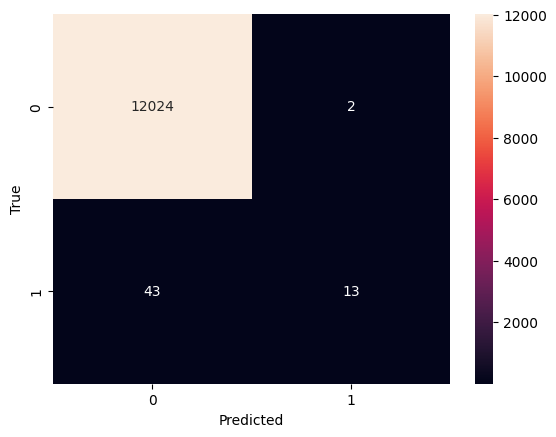

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

